In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from matplotlib.ticker import FuncFormatter
plt.rcParams['font.sans-serif']=['Arial Unicode MS']

import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings('ignore')

In [2]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
data_df = pd.read_csv('data.csv', encoding = 'ISO-8859-1')
data_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## 1、	进行数据预处理

* 	去除取消的订单；

In [5]:
df = data_df
df = df.drop(df.loc[df['InvoiceNo'].str.contains('C')].index )

In [6]:
df.loc[df['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


* 	去除完全重复（各个属性完全一样）的行；

In [7]:
df = df.drop_duplicates()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


* 	去除客户ID为空的行；

In [8]:
df = df.dropna(subset=['CustomerID'])

* 	去除总金额（单价*数量）<=0的行

In [9]:
'''计算总价'''
df['total'] = df['Quantity'] * df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [10]:
df[df['total'] >0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


## 2、	对用户进行RFM划分，比较日期统一取2011年12月9日，最近消费时间的单位取天。计算用户标签，并用柱状图表示其分布。

### R值统计(用户最近消费时间)

In [11]:
import datetime

df.loc[:,'InvoiceDate'] = pd.to_datetime(df.loc[:,'InvoiceDate'])

In [12]:
r_df = df.groupby('CustomerID', as_index=False)['InvoiceDate']\
                    .agg({'recent':'max'})
r_df

,CustomerID,recent
0,12346.0,2011-01-18 10:01:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00
...,...,...
4334,18280.0,2011-03-07 09:52:00
4335,18281.0,2011-06-12 10:53:00
4336,18282.0,2011-12-02 11:43:00
4337,18283.0,2011-12-06 12:02:00


In [13]:
#设定比较日期
Comparing_date = datetime.datetime.strptime('2011-12-9',"%Y-%m-%d")

r_df['recent_num'] = r_df['recent'].apply(lambda x:(Comparing_date - x).days)
r_df

,CustomerID,recent,recent_num
0,12346.0,2011-01-18 10:01:00,324
1,12347.0,2011-12-07 15:52:00,1
2,12348.0,2011-09-25 13:13:00,74
3,12349.0,2011-11-21 09:51:00,17
4,12350.0,2011-02-02 16:01:00,309
...,...,...,...
4334,18280.0,2011-03-07 09:52:00,276
4335,18281.0,2011-06-12 10:53:00,179
4336,18282.0,2011-12-02 11:43:00,6
4337,18283.0,2011-12-06 12:02:00,2


In [14]:
r_df.describe()

,CustomerID,recent_num
count,4339.000000,4339.000000
mean,15299.936852,91.041484
std,1721.889758,100.007757
min,12346.000000,-1.000000
25%,13812.500000,16.000000
50%,15299.000000,49.000000
75%,16778.500000,140.500000
max,18287.000000,372.000000


In [15]:
def r_score(x):
    if x <= 30:
        return 4
    elif x <= 60:
        return 3
    elif x <= 120:
        return 2
    else:
        return 1

In [16]:
r_df['r_score'] = r_df['recent_num'].apply(r_score)
r_df

,CustomerID,recent,recent_num,r_score
0,12346.0,2011-01-18 10:01:00,324,1
1,12347.0,2011-12-07 15:52:00,1,4
2,12348.0,2011-09-25 13:13:00,74,2
3,12349.0,2011-11-21 09:51:00,17,4
4,12350.0,2011-02-02 16:01:00,309,1
...,...,...,...,...
4334,18280.0,2011-03-07 09:52:00,276,1
4335,18281.0,2011-06-12 10:53:00,179,1
4336,18282.0,2011-12-02 11:43:00,6,4
4337,18283.0,2011-12-06 12:02:00,2,4


In [17]:
r_group_df = r_df.groupby('recent_num', as_index=False)['CustomerID']\
                    .agg({'user_num':'count'})
r_group_df

,recent_num,user_num
0,-1,35
1,0,103
2,1,90
3,2,94
4,3,94
...,...,...
299,367,5
300,368,3
301,370,6
302,371,18


In [18]:
recent_values = r_group_df['recent_num'].values
recent_count = r_group_df['user_num'].values

recent_values_sum = np.cumsum(recent_count)
recent_values_sum_per = recent_values_sum / recent_values_sum[-1]

In [19]:
recent_values_sum

array([  35,  138,  228,  322,  416,  464,  536,  615,  686,  763,  826,
        868,  909,  971, 1030, 1104, 1156, 1216, 1270, 1334, 1392, 1442,
       1488, 1528, 1572, 1629, 1668, 1715, 1749, 1788, 1819, 1855, 1884,
       1909, 1934, 1971, 1994, 2021, 2052, 2074, 2106, 2117, 2136, 2177,
       2205, 2232, 2266, 2278, 2297, 2328, 2356, 2377, 2411, 2426, 2454,
       2486, 2512, 2536, 2554, 2561, 2581, 2612, 2638, 2661, 2682, 2705,
       2722, 2751, 2768, 2780, 2800, 2806, 2819, 2838, 2848, 2860, 2876,
       2890, 2898, 2915, 2919, 2930, 2948, 2958, 2964, 2974, 2984, 2988,
       2997, 3004, 3021, 3032, 3042, 3049, 3057, 3067, 3077, 3087, 3093,
       3105, 3108, 3119, 3124, 3127, 3134, 3139, 3144, 3150, 3163, 3173,
       3183, 3189, 3195, 3205, 3218, 3223, 3225, 3231, 3244, 3248, 3254,
       3260, 3266, 3270, 3275, 3281, 3290, 3298, 3300, 3309, 3312, 3321,
       3329, 3339, 3350, 3354, 3360, 3367, 3373, 3379, 3385, 3391, 3395,
       3399, 3411, 3418, 3422, 3432, 3445, 3447, 34

In [20]:
recent_values_sum_per

array([0.00806637, 0.03180456, 0.05254667, 0.07421065, 0.09587463,
       0.10693708, 0.12353077, 0.14173773, 0.15810094, 0.17584697,
       0.19036644, 0.20004609, 0.20949528, 0.22378428, 0.23738189,
       0.25443651, 0.26642083, 0.28024891, 0.29269417, 0.30744411,
       0.32081125, 0.33233464, 0.34293616, 0.35215487, 0.36229546,
       0.37543213, 0.38442037, 0.39525236, 0.40308827, 0.41207652,
       0.41922102, 0.42751786, 0.43420143, 0.43996313, 0.44572482,
       0.45425213, 0.45955289, 0.46577552, 0.47292003, 0.47799032,
       0.48536529, 0.48790044, 0.49227933, 0.50172851, 0.50818161,
       0.51440424, 0.52224015, 0.52500576, 0.52938465, 0.53652915,
       0.54298225, 0.54782208, 0.55565799, 0.559115  , 0.5655681 ,
       0.57294307, 0.57893524, 0.58446647, 0.58861489, 0.59022816,
       0.59483752, 0.60198202, 0.60797419, 0.61327495, 0.61811477,
       0.62341553, 0.62733349, 0.63401705, 0.63793501, 0.64070062,
       0.64530998, 0.64669279, 0.64968887, 0.65406776, 0.65637

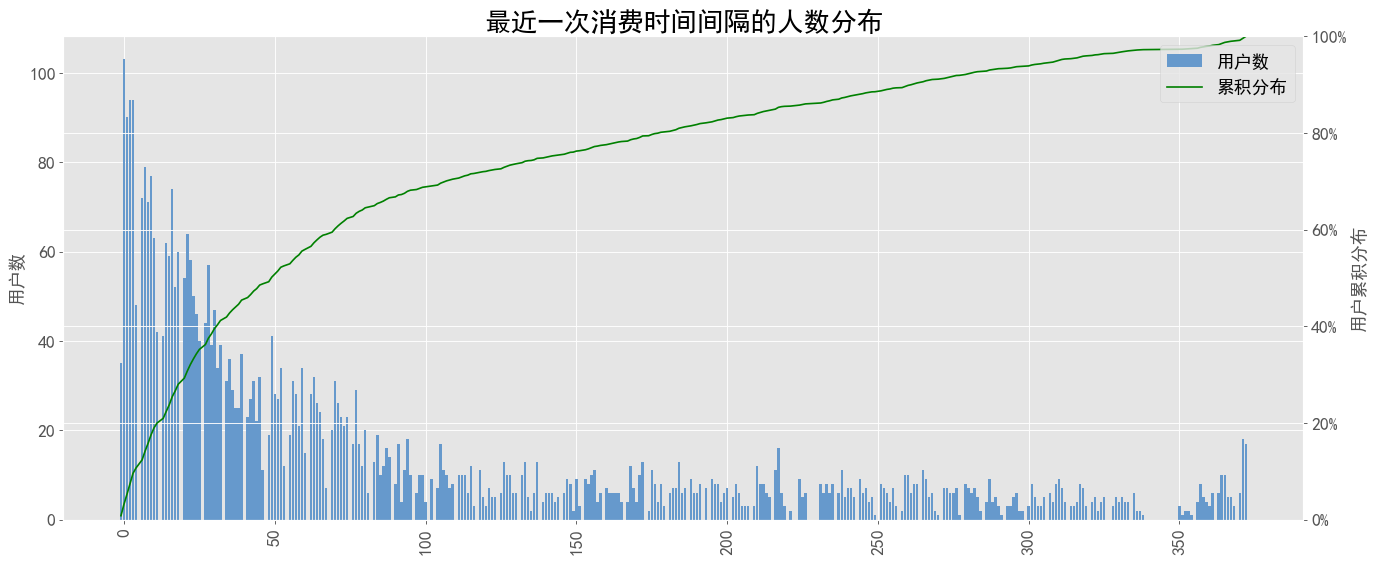

In [21]:
x = recent_values
y = recent_count
y2 = recent_values_sum_per

fig = plt.figure(figsize=(20,8),dpi=80)
plt.style.use('ggplot')

plt.title("最近一次消费时间间隔的人数分布", size=24) # 图标题

ax1 = fig.add_subplot(111)
ax1.bar(x, y, width=0.8, color='#6699CC', label="用户数")
ax1.set_ylabel("用户数", size=16)
  
plt.xticks(size=16, rotation=90) # x轴字体大小调整
plt.yticks(size=16) # y轴字体大小调整

ax2 = ax1.twinx() 
ax2.plot(x, y2, 'g',label = "累积分布")
ax2.set_ylabel("用户累积分布", size=16)

plt.ylim(ymin=0,ymax=1)

def to_percent(temp, position):
    return '%1.0f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.xticks(size=16, rotation=90) # x轴字体大小调整
plt.yticks(size=16) # y轴字体大小调整

fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes, fontsize=16)

### F值统计（用户消费频率）

In [22]:
f_df = df.groupby('CustomerID', as_index=False)['InvoiceNo']\
                    .agg({'freq_num':'nunique'})
f_df

,CustomerID,freq_num
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4334,18280.0,1
4335,18281.0,1
4336,18282.0,2
4337,18283.0,16


In [23]:
def f_score(x):
    if x <= 1:
        return 1
    elif x <= 2:
        return 2
    elif x <= 6:
        return 3
    else:
        return 4

In [24]:
f_df['f_score'] = f_df['freq_num'].apply(f_score)
f_df

,CustomerID,freq_num,f_score
0,12346.0,1,1
1,12347.0,7,4
2,12348.0,4,3
3,12349.0,1,1
4,12350.0,1,1
...,...,...,...
4334,18280.0,1,1
4335,18281.0,1,1
4336,18282.0,2,2
4337,18283.0,16,4


In [25]:
f_group_df = f_df.groupby('freq_num', as_index=False)['CustomerID']\
                    .agg({'user_num':'count'})
f_group_df

,freq_num,user_num
0,1,1494
1,2,835
2,3,508
3,4,387
4,5,243
5,6,172
6,7,143
7,8,98
8,9,68
9,10,54


In [26]:
freq_values = f_group_df['freq_num'].values
freq_count = f_group_df['user_num'].values

freq_values_sum = np.cumsum(freq_count)
freq_values_sum_per = freq_values_sum / freq_values_sum[-1]

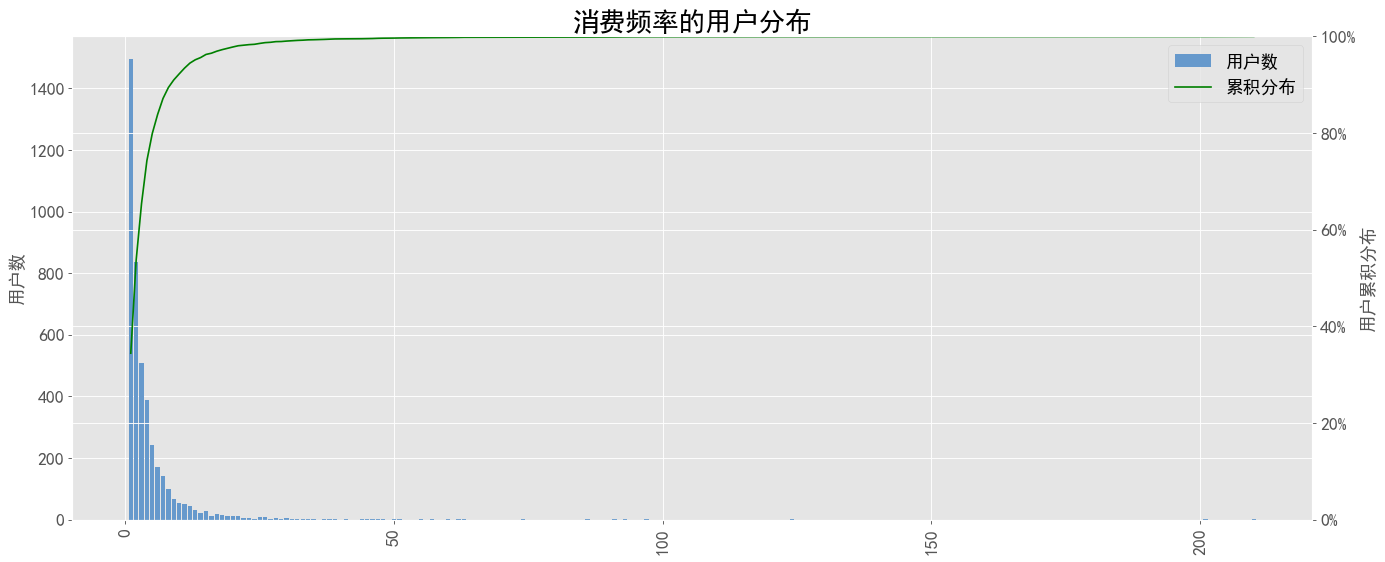

In [27]:
x = freq_values[:130]
y = freq_count[:130]
y2 = freq_values_sum_per[:130]

fig = plt.figure(figsize=(20,8),dpi=80)
plt.style.use('ggplot')

plt.title("消费频率的用户分布", size=24) # 图标题

ax1 = fig.add_subplot(111)
ax1.bar(x, y, width=0.8, color='#6699CC', label="用户数")
ax1.set_ylabel("用户数", size=16)
  
plt.xticks(size=16, rotation=90) # x轴字体大小调整
plt.yticks(size=16) # y轴字体大小调整

ax2 = ax1.twinx() 
ax2.plot(x, y2, 'g',label = "累积分布")
ax2.set_ylabel("用户累积分布", size=16)

plt.ylim(ymin=0,ymax=1)

def to_percent(temp, position):
    return '%1.0f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.xticks(size=16, rotation=90) # x轴字体大小调整
plt.yticks(size=16) # y轴字体大小调整

fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes, fontsize=16)

### 统计M值（用户消费金额）

In [28]:
df['total']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: total, Length: 392732, dtype: float64

In [29]:
m_df = df.groupby('CustomerID', as_index=False)['total']\
                    .agg({'mone_sum':'sum'})
m_df

,CustomerID,mone_sum
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2045.53


In [30]:
df.describe()

,Quantity,UnitPrice,CustomerID,total
count,392732.000000,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822,22.629195
std,181.588420,22.240725,1713.567773,311.083465
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13955.000000,4.950000
50%,6.000000,1.950000,15150.000000,12.390000
75%,12.000000,3.750000,16791.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


In [31]:
def m_score(x):
    if x <= 12:
        return 1
    elif x <= 311:
        return 2
    elif x <= 1000:
        return 3
    else:
        return 4

In [32]:
m_df['m_score'] = m_df['mone_sum'].apply(m_score)
m_df

,CustomerID,mone_sum,m_score
0,12346.0,77183.60,4
1,12347.0,4310.00,4
2,12348.0,1797.24,4
3,12349.0,1757.55,4
4,12350.0,334.40,3
...,...,...,...
4334,18280.0,180.60,2
4335,18281.0,80.82,2
4336,18282.0,178.05,2
4337,18283.0,2045.53,4


In [33]:
rfm_midd_df = pd.merge(r_df, f_df, on='CustomerID')
rfm_midd_df

,CustomerID,recent,recent_num,r_score,freq_num,f_score
0,12346.0,2011-01-18 10:01:00,324,1,1,1
1,12347.0,2011-12-07 15:52:00,1,4,7,4
2,12348.0,2011-09-25 13:13:00,74,2,4,3
3,12349.0,2011-11-21 09:51:00,17,4,1,1
4,12350.0,2011-02-02 16:01:00,309,1,1,1
...,...,...,...,...,...,...
4334,18280.0,2011-03-07 09:52:00,276,1,1,1
4335,18281.0,2011-06-12 10:53:00,179,1,1,1
4336,18282.0,2011-12-02 11:43:00,6,4,2,2
4337,18283.0,2011-12-06 12:02:00,2,4,16,4


In [34]:
rfm_final_df = pd.merge(rfm_midd_df, m_df, on='CustomerID')
rfm_final_df

,CustomerID,recent,recent_num,r_score,freq_num,f_score,mone_sum,m_score
0,12346.0,2011-01-18 10:01:00,324,1,1,1,77183.60,4
1,12347.0,2011-12-07 15:52:00,1,4,7,4,4310.00,4
2,12348.0,2011-09-25 13:13:00,74,2,4,3,1797.24,4
3,12349.0,2011-11-21 09:51:00,17,4,1,1,1757.55,4
4,12350.0,2011-02-02 16:01:00,309,1,1,1,334.40,3
...,...,...,...,...,...,...,...,...
4334,18280.0,2011-03-07 09:52:00,276,1,1,1,180.60,2
4335,18281.0,2011-06-12 10:53:00,179,1,1,1,80.82,2
4336,18282.0,2011-12-02 11:43:00,6,4,2,2,178.05,2
4337,18283.0,2011-12-06 12:02:00,2,4,16,4,2045.53,4


In [35]:
rfm_final_df['rank_rfm'] = rfm_final_df['r_score'] + rfm_final_df['f_score'] + rfm_final_df['m_score']
rfm_final_df = rfm_final_df[['CustomerID', 'r_score', 'f_score', 'm_score', 'rank_rfm']]
rfm_final_df

,CustomerID,r_score,f_score,m_score,rank_rfm
0,12346.0,1,1,4,6
1,12347.0,4,4,4,12
2,12348.0,2,3,4,9
3,12349.0,4,1,4,9
4,12350.0,1,1,3,5
...,...,...,...,...,...
4334,18280.0,1,1,2,4
4335,18281.0,1,1,2,4
4336,18282.0,4,2,2,8
4337,18283.0,4,4,4,12


In [36]:
rfm_final_df.describe()

,CustomerID,r_score,f_score,m_score,rank_rfm
count,4339.000000,4339.00000,4339.000000,4339.000000,4339.000000
mean,15299.936852,2.67504,2.280249,3.124453,8.079742
std,1721.889758,1.25255,1.101491,0.793123,2.623809
min,12346.000000,1.00000,1.000000,1.000000,3.000000
25%,13812.500000,1.00000,1.000000,2.000000,6.000000
50%,15299.000000,3.00000,2.000000,3.000000,8.000000
75%,16778.500000,4.00000,3.000000,4.000000,10.000000
max,18287.000000,4.00000,4.000000,4.000000,12.000000


In [37]:
def f(a, b, c):
    return [a, b, c]
    
rfm_final_df['rfm_list'] = rfm_final_df.apply(lambda x: f(x.r_score, x.f_score, x.m_score), axis=1)
rfm_final_df

,CustomerID,r_score,f_score,m_score,rank_rfm,rfm_list
0,12346.0,1,1,4,6,"[1.0, 1.0, 4.0]"
1,12347.0,4,4,4,12,"[4.0, 4.0, 4.0]"
2,12348.0,2,3,4,9,"[2.0, 3.0, 4.0]"
3,12349.0,4,1,4,9,"[4.0, 1.0, 4.0]"
4,12350.0,1,1,3,5,"[1.0, 1.0, 3.0]"
...,...,...,...,...,...,...
4334,18280.0,1,1,2,4,"[1.0, 1.0, 2.0]"
4335,18281.0,1,1,2,4,"[1.0, 1.0, 2.0]"
4336,18282.0,4,2,2,8,"[4.0, 2.0, 2.0]"
4337,18283.0,4,4,4,12,"[4.0, 4.0, 4.0]"


In [38]:
def rmf(x):
    if x[0] > 3:
        if x[1] > 3:
            if x[2] > 3:
                return '重要价值用户'
            else:
                return '一般价值用户'
        if x[1] < 3:
            if x[2] > 3:
                return '重要发展用户'
            else:
                return '一般发展用户'
    else:
        if x[1] > 3:
            if x[2] > 3:
                return '重要保持用户'
            else:
                return '一般保持用户'
        if x[1] < 3:
            if x[2] > 3:
                return '重要挽留用户'
            else:
                return '一般挽留用户'      

In [39]:
rfm_final_df['custom'] = rfm_final_df['rfm_list'].apply(rmf)
rfm_final_df

,CustomerID,r_score,f_score,m_score,rank_rfm,rfm_list,custom
0,12346.0,1,1,4,6,"[1.0, 1.0, 4.0]",重要挽留用户
1,12347.0,4,4,4,12,"[4.0, 4.0, 4.0]",重要价值用户
2,12348.0,2,3,4,9,"[2.0, 3.0, 4.0]",None
3,12349.0,4,1,4,9,"[4.0, 1.0, 4.0]",重要发展用户
4,12350.0,1,1,3,5,"[1.0, 1.0, 3.0]",一般挽留用户
...,...,...,...,...,...,...,...
4334,18280.0,1,1,2,4,"[1.0, 1.0, 2.0]",一般挽留用户
4335,18281.0,1,1,2,4,"[1.0, 1.0, 2.0]",一般挽留用户
4336,18282.0,4,2,2,8,"[4.0, 2.0, 2.0]",一般发展用户
4337,18283.0,4,4,4,12,"[4.0, 4.0, 4.0]",重要价值用户


In [40]:
jd_rmf_df = rfm_final_df.groupby('custom', as_index=False)['CustomerID']\
                    .agg({'custom_num':'count'})
jd_rmf_df

,custom,custom_num
0,一般价值用户,8
1,一般保持用户,8
2,一般发展用户,459
3,一般挽留用户,1661
4,重要价值用户,563
5,重要保持用户,121
6,重要发展用户,46
7,重要挽留用户,163


In [41]:
list_sorted = ['一般价值用户', '一般保持用户', '一般发展用户','一般挽留用户','重要保持用户','重要发展用户','重要挽留用户','重要价值用户']
#对相关列进行自定义排序
jd_rmf_df['custom'] = jd_rmf_df['custom'].astype('category').cat.set_categories(list_sorted)

jd_rmf_df = jd_rmf_df.sort_values(by=['custom'], ascending=True)
jd_rmf_df

,custom,custom_num
0,一般价值用户,8
1,一般保持用户,8
2,一般发展用户,459
3,一般挽留用户,1661
5,重要保持用户,121
6,重要发展用户,46
7,重要挽留用户,163
4,重要价值用户,563


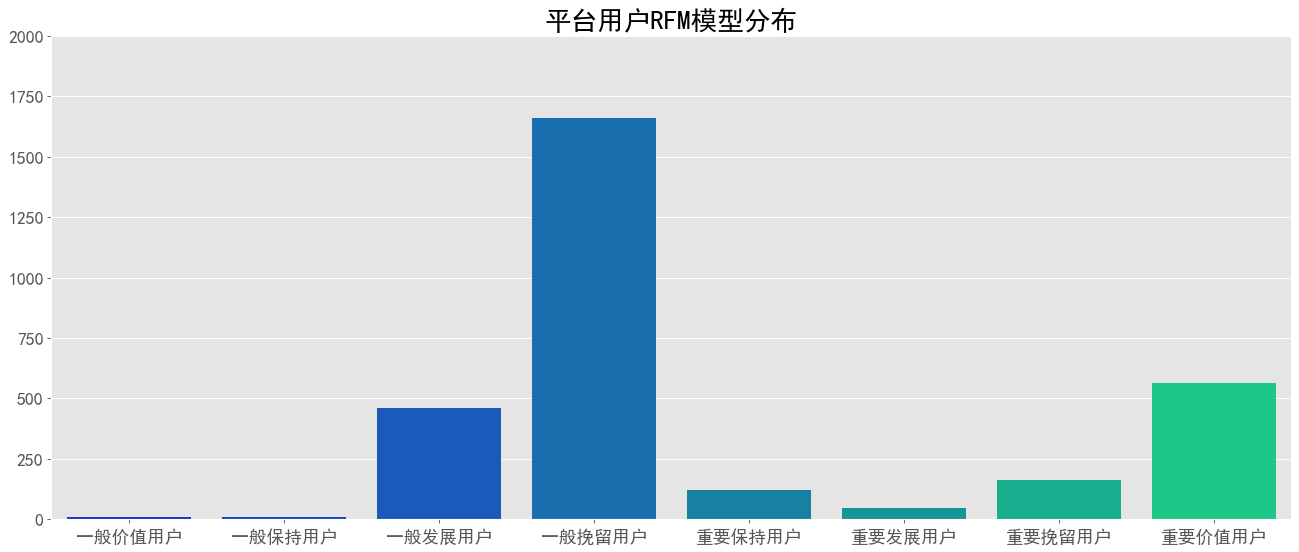

In [42]:
x = jd_rmf_df['custom'].values
y = jd_rmf_df['custom_num'].values

plt.figure(figsize=(20,8),dpi=80)

plt.style.use('ggplot') # 图风格

plt.ylim(ymax=2000)

plt.title("平台用户RFM模型分布", size=24) # 图标题

plt.xticks(size=16) # x轴字体大小调整
plt.yticks(size=16) # y轴字体大小调整

sns.barplot(x, y, palette="winter")
# plt.bar(x, y, width=0.3, color='#6699CC')